# Autoencoder Neural Network
This notebook demonstrates how to create a 64x16x64 autoencoder using the provided NeuralNetwork class.

In [1]:
import numpy as np
from typing import List, Dict, Tuple, Union
from numpy.typing import ArrayLike
from nn.nn import NeuralNetwork
from nn.io import read_text_file, read_fasta_file
from nn.preprocess import sample_seqs, one_hot_encode_seqs
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Paste the provided NeuralNetwork class here


In [2]:
# Define the architecture of the autoencoder
nn_arch = [
    {'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},
    {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}
]
# Initialize the NeuralNetwork with the architecture
autoencoder = NeuralNetwork(nn_arch=nn_arch, lr=0.01, seed=42, batch_size=16, epochs=90, loss_function='mse')

## Prepare the Dataset
Here, you would typically load and preprocess your dataset. For demonstration, we will create a synthetic dataset.

In [3]:
# Create a synthetic dataset
dataset = load_digits()
print(len(dataset["data"][0]))
X_train, X_test, y_train, y_test = train_test_split(dataset["data"], dataset["target"], test_size = 0.2)

64


## Train the Autoencoder
Now, we train the autoencoder using the synthetic dataset.

In [4]:
# Training the autoencoder
train_loss, val_loss = autoencoder.fit(X_train, y_train, X_test, y_test)

# Optionally, plot the training and validation loss over epochs

X.T.SHAPE: (64, 16)
idx:  0
dict_keys(['W1', 'b1', 'W2', 'b2'])
idx:  1
dict_keys(['W1', 'b1', 'W2', 'b2'])
X.T.SHAPE: (64, 360)
idx:  0
dict_keys(['W1', 'b1', 'W2', 'b2'])
idx:  1
dict_keys(['W1', 'b1', 'W2', 'b2'])
y.shape: (16,)
y.shape: (360,)
y.shape: (16,)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

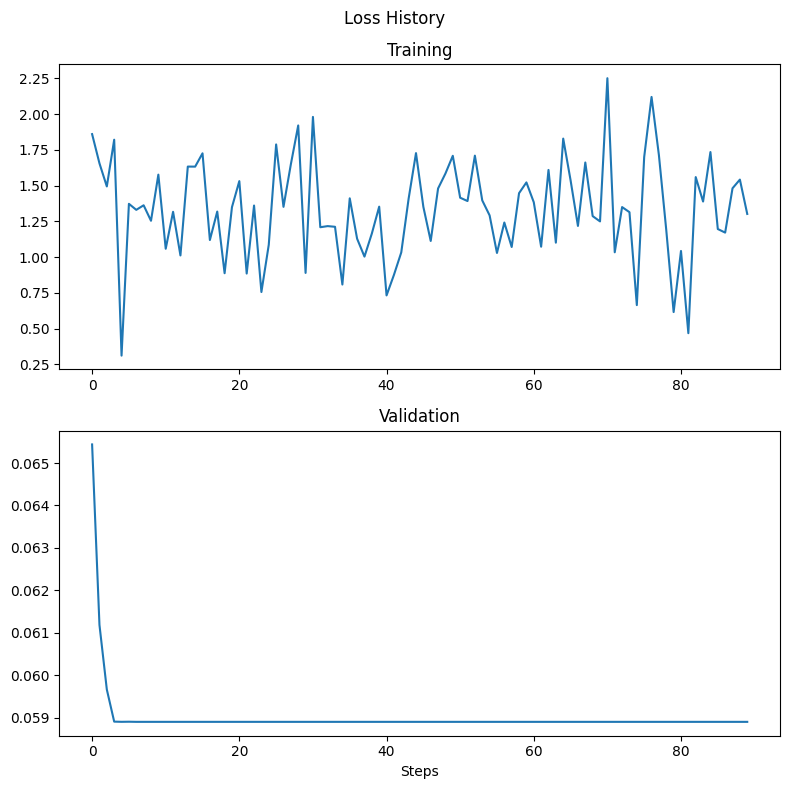

In [ ]:
autoencoder._plot_loss_history(train_loss = train_loss, val_loss = val_loss)

In [16]:
# Define the architecture of the autoencoder
dataset = read_text_file("data/rap1-lieb-positives.txt")
labels = [True for i in range(len(dataset))]
negatives = read_fasta_file("data/yeast-upstream-1k-negative.fa")
negative_labels = [False for i in range(len(negatives))]
print("negatives: ", len(negatives), negatives[:4])
print("dataset: ", len(dataset), dataset[:4])
num_negatives = len(negatives) - len(dataset)
print(num_negatives)
dataset.extend(negatives)
labels.extend(negative_labels)
print(len(labels), len(dataset), labels[:4], dataset[:4], sep = "\t")
dataset, labels = sample_seqs(dataset, labels)
print("post_sample_seqs: ", len(dataset), len(labels), labels[:4], dataset[:4], sep = "\t")
dataset = one_hot_encode_seqs(dataset)
print("post_ohes: ", len(dataset), len(labels), labels[:4], dataset[0], sep = "\t")
print(dataset[:4])
min_len_seq = min([len(i) for i in dataset])
print("min_len_seq: ", min_len_seq)
dataset = np.array(dataset)
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size = 0.2)

nn_arch = [
    {'input_dim': 68, 'output_dim': 32, 'activation': 'sigmoid'},
    {'input_dim': 32, 'output_dim': 8, 'activation': 'sigmoid'},
    {'input_dim': 8, 'output_dim': 1, 'activation': 'sigmoid'}
]
# Initialize the NeuralNetwork with the architecture
autoencoder = NeuralNetwork(nn_arch=nn_arch, lr=0.1, seed=42, batch_size=16, epochs=9, loss_function='mse')

negatives:  3163 ['CTTCATGTCAGCCTGCACTTCTGGGTCGTTGAAGTTTCTACCGATCAAACGCTTAGCGTCGAAAACGGTATTCGAAGGATTCATAGCAGCTTGATTCTTAGCAGCATCACCAATCAATCTTTCAGTGTCAGTGAAAGCGACAAAAGATGGAGTGGTTCTGTTACCTTGATCGTTGGCAATAATGTCCACACGATCATTAGCAAAGTGAGCAACACACGAGTATGTTGTACCTAAATCAATACCGACAGCTTTTGACATATTATCTGTTATTTACTTGAATTTTTGTTTCTTGTAATACTTGATTACTTTTCTTTTGATGTGCTTATCTTACAAATAGAGAAAATAAAACAACTTAAGTAAGAATTGGGAAACGAAACTACAACTCAATCCCTTCTCGAAGATACATCAATCCACCCCTTATATAACCTTGAAGTCCTCGAAACGATCAGCTAATCTAAATGGCCCCCCTTCTTTTTGGGTTCTTTCTCTCCCTTTTGCCGCCGATGGAACGTTCTGGAAAAAGAAGAATAATTTAATTACTTTCTCAACTAAAATCTGGAGAAAAAACGCAAATGACAGCTTCTAAACGTTCCGTGTGCTTTCTTTCTAGAATGTTCTGGAAAGTTTACAACAATCCACAAGAACGAAAATGCCGTTGACAATGATGAAACCATCATCCACACACCGCGCACACGTGCTTTATTTCTTTTTCTGAATTTTTTTTTTCCGCCATTTTCAACCAAGGAAATTTTTTTTCTTAGGGCTCAGAACCTGCAGGTGAAGAAGCGCTTTAGAAATCAAAGCACAACGTAACAATTTGTCGACAACCGAGCCTTTGAAGAAAAAATTTTTCACATTGTCGCCTCTAAATAAATAGTTTAAGGTTATCTACCCACTATATTTAGTTGGTTCTTTTTTTTTTCCTTCTACTCTTTATCTTTTTACCTCATGCTTTCTACCTTTCAGCACTGAAGAGTCCAA

In [8]:
print(X_train[0])
print(y_train[0])

[0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0]
True


In [17]:
train_loss, val_loss = autoencoder.fit(X_train, y_train, X_test, y_test)

X.T.SHAPE: (68, 16)
idx:  0
dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
idx:  1
dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
idx:  2
dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
X.T.SHAPE: (68, 55)
idx:  0
dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
idx:  1
dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
idx:  2
dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
y.shape: (16,)
y.shape: (55,)
y.shape: (16,)
shapes:  (32, 68) (32, 68)
shapes:  (32, 1) (32, 1)
shapes:  (8, 32) (8, 32)
shapes:  (8, 1) (8, 1)
shapes:  (1, 8) (1, 8)
shapes:  (1, 1) (1, 1)
Epoch 1/9, Loss: [0.01586533], Val Loss: [0.00458415]
X.T.SHAPE: (68, 16)
idx:  0
dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
idx:  1
dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
idx:  2
dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
X.T.SHAPE: (68, 55)
idx:  0
dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
idx:  1
dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
idx:  2
dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
y.s

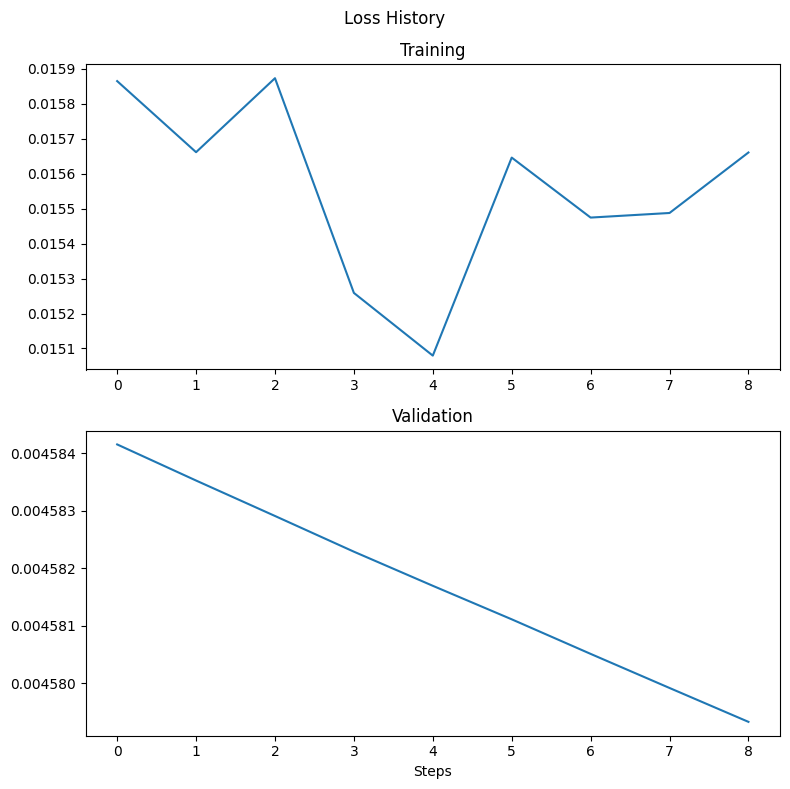

In [18]:
autoencoder._plot_loss_history(train_loss = train_loss, val_loss = val_loss)